# Import Packages

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import confusion_matrix


# 1. Load Dataset


In [3]:
# Placeholder for dataset loading, replace 'path_to_dataset.csv' with actual path
data = pd.read_csv('/Users/a/Downloads/repurchase_dataset.csv')
print(data.head())
print(data.shape)


   ID  Target     age_band  gender car_model   car_segment  \
0   1       0  3. 35 to 44    Male   model_1           LCV   
1   2       0          NaN     NaN   model_2  Small/Medium   
2   3       0          NaN    Male   model_3     Large/SUV   
3   5       0          NaN     NaN   model_3     Large/SUV   
4   6       0          NaN  Female   model_2  Small/Medium   

   age_of_vehicle_years  sched_serv_warr  non_sched_serv_warr  \
0                     9                2                   10   
1                     6               10                    3   
2                     9               10                    9   
3                     5                8                    5   
4                     8                9                    4   

   sched_serv_paid  non_sched_serv_paid  total_paid_services  total_services  \
0                3                    7                    5               6   
1               10                    4                    9              10

In [4]:
data.head(15)

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9
5,7,0,NaN,Male,model_5,Large/SUV,7,4,10,5,7,6,8,8,5,10,4
6,8,0,1. <25,Male,model_3,Large/SUV,8,2,8,2,9,9,4,7,6,10,4
7,9,0,NaN,Male,model_6,Small/Medium,7,4,9,6,9,8,6,9,5,5,8
8,10,0,NaN,NaN,model_4,Small/Medium,1,2,1,1,3,1,2,1,1,2,3
9,11,0,NaN,NaN,model_4,Small/Medium,3,1,1,2,1,2,1,1,1,1,1


In [5]:
data.tail()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
131332,154134,1,NaN,NaN,model_3,Large/SUV,7,10,10,9,10,10,10,3,6,10,10
131333,154135,1,NaN,NaN,model_3,Large/SUV,4,10,10,10,10,10,10,2,3,10,10
131334,154137,1,NaN,NaN,model_5,Large/SUV,4,4,9,5,4,3,8,4,7,10,10
131335,154138,1,NaN,NaN,model_5,Large/SUV,2,1,10,1,10,9,8,3,6,7,10
131336,154139,1,NaN,NaN,model_1,LCV,6,1,7,1,10,10,5,3,4,9,10


In [6]:
data.shape

(131337, 17)

# 2. Explore Dataset

In [7]:
# Initialize label encoders
label_encoder_gender = LabelEncoder()
label_encoder_age_band = LabelEncoder()
# Drop the 'ID' column
data.drop('ID', axis=1, inplace=True)
data.drop('age_band', axis=1, inplace=True)

# Encode the 'gender' column
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'].astype(str))

# One-hot encode the 'car_model' and 'car_segment' columns
data = pd.get_dummies(data, columns=['car_model', 'car_segment'])


              Target         gender  age_of_vehicle_years  sched_serv_warr  \
count  131337.000000  131337.000000         131337.000000    131337.000000   
mean        0.026809       1.330075              5.493022         5.452500   
std         0.161525       0.785114              2.843299         2.884328   
min         0.000000       0.000000              1.000000         1.000000   
25%         0.000000       1.000000              3.000000         3.000000   
50%         0.000000       2.000000              5.000000         5.000000   
75%         0.000000       2.000000              8.000000         8.000000   
max         1.000000       2.000000             10.000000        10.000000   

       non_sched_serv_warr  sched_serv_paid  non_sched_serv_paid  \
count        131337.000000    131337.000000        131337.000000   
mean              5.472517         5.452287             5.497050   
std               2.870665         2.886528             2.878699   
min               1.00000

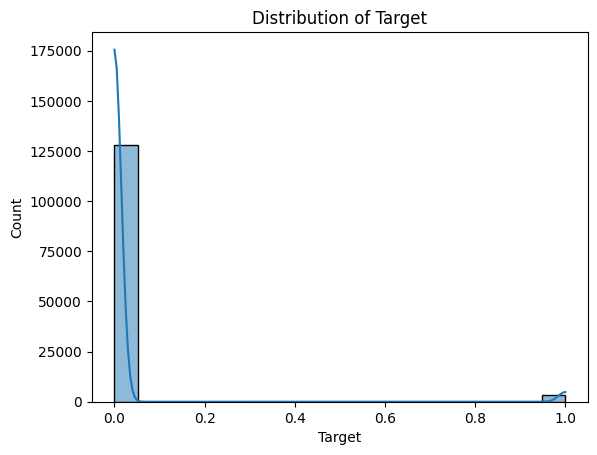

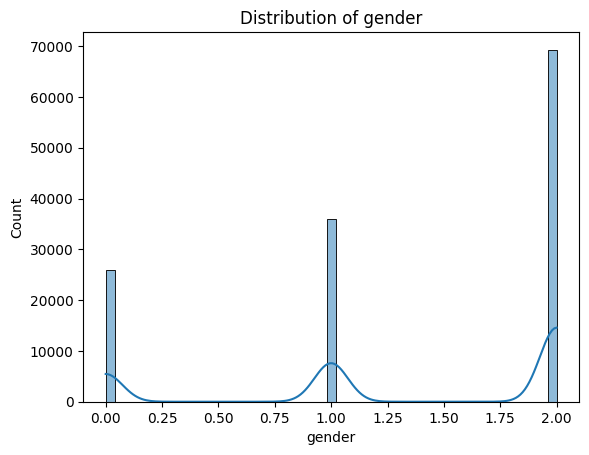

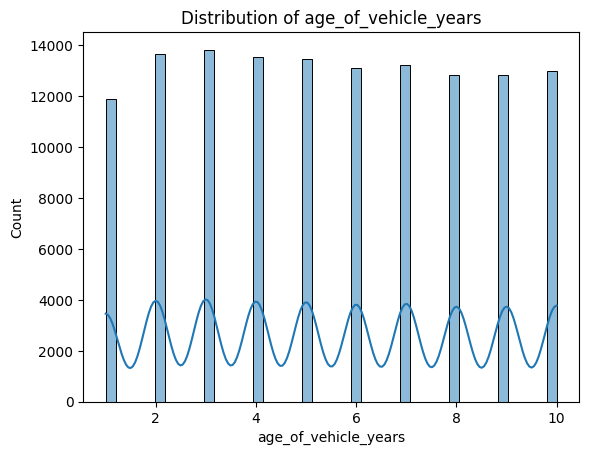

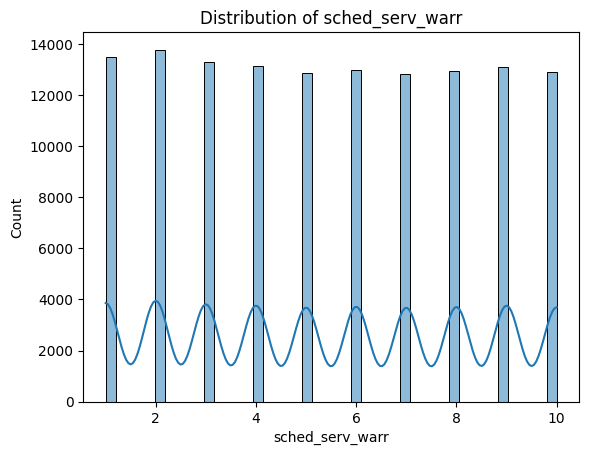

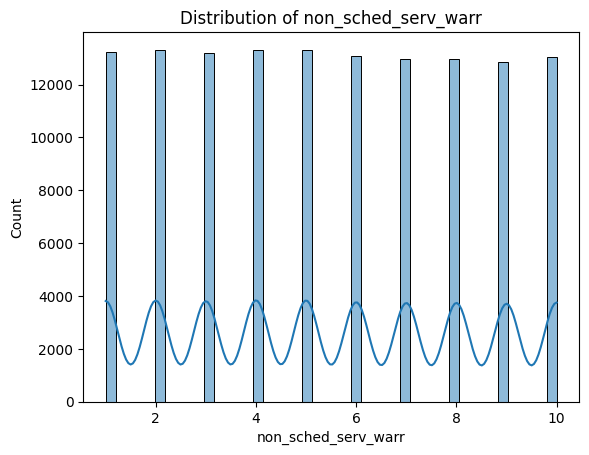

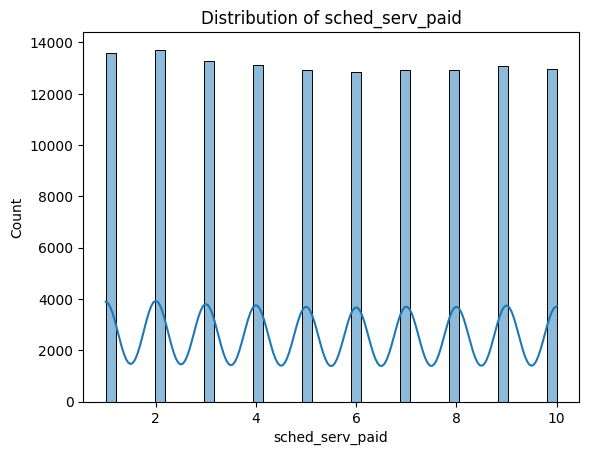

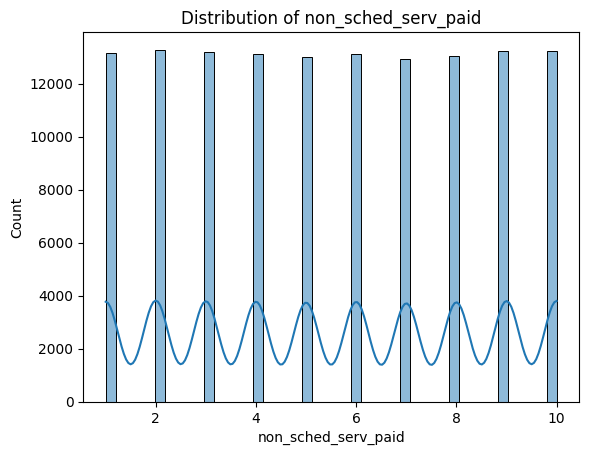

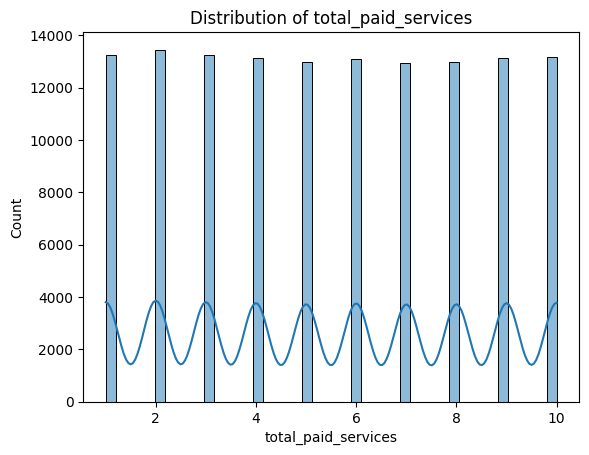

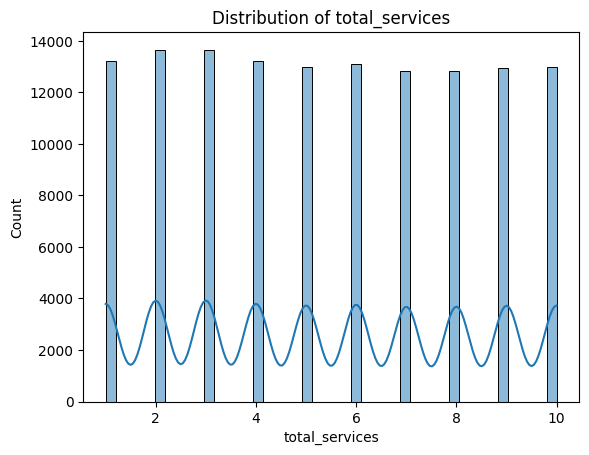

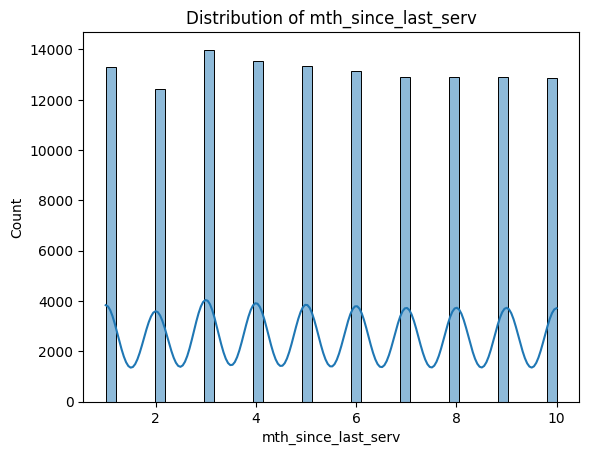

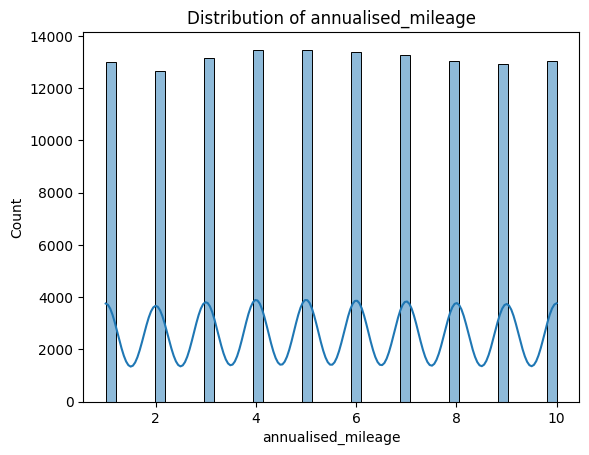

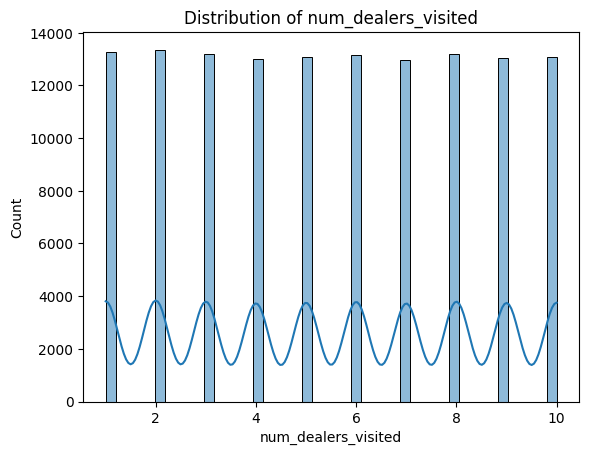

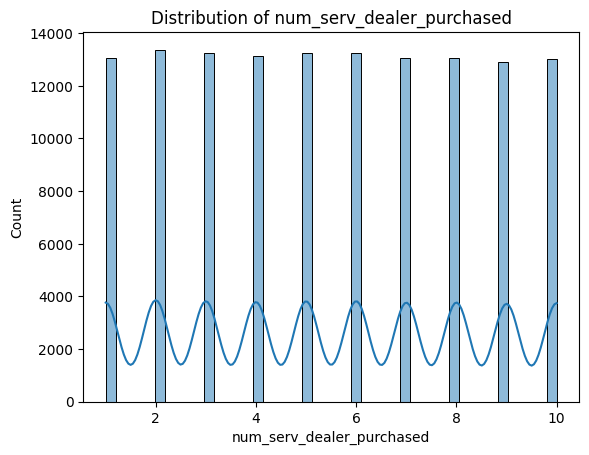

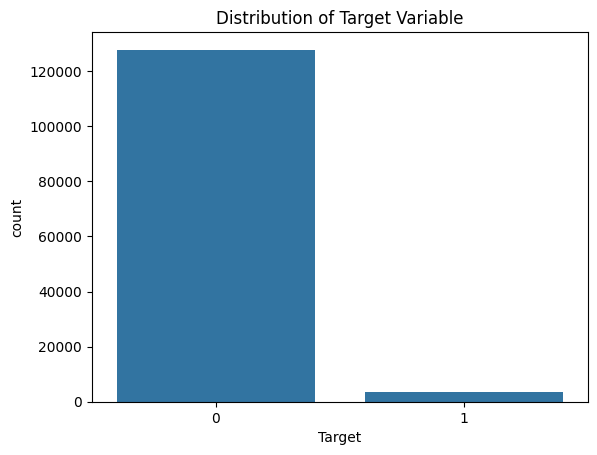

In [134]:
# Basic statistics
print(data.describe())
print(data.info())

# Visualizing the distribution of numerical features
for column in data.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure()
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# Exploring the target variable
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable')
plt.show()



In [135]:
# Ensure all operations are separated and clear
if data.select_dtypes(include=['number']).isnull().any().any():
    data.fillna(data.mean(), inplace=True)  # Fill numerical missing values with mean

if data.select_dtypes(include=['object']).isnull().any().any():
    data.fillna('Unknown', inplace=True)  # Fill categorical missing values with 'Unknown'


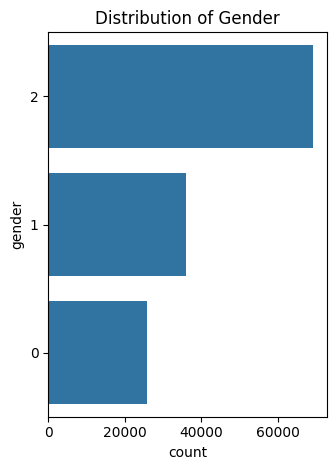

In [136]:
# Step 2: Analyze Categorical Data
# Plotting the distribution 'gender'
plt.subplot(1, 2, 2)
sns.countplot(y='gender', data=data, order = data['gender'].value_counts().index)
plt.title('Distribution of Gender')
plt.tight_layout()
plt.show()

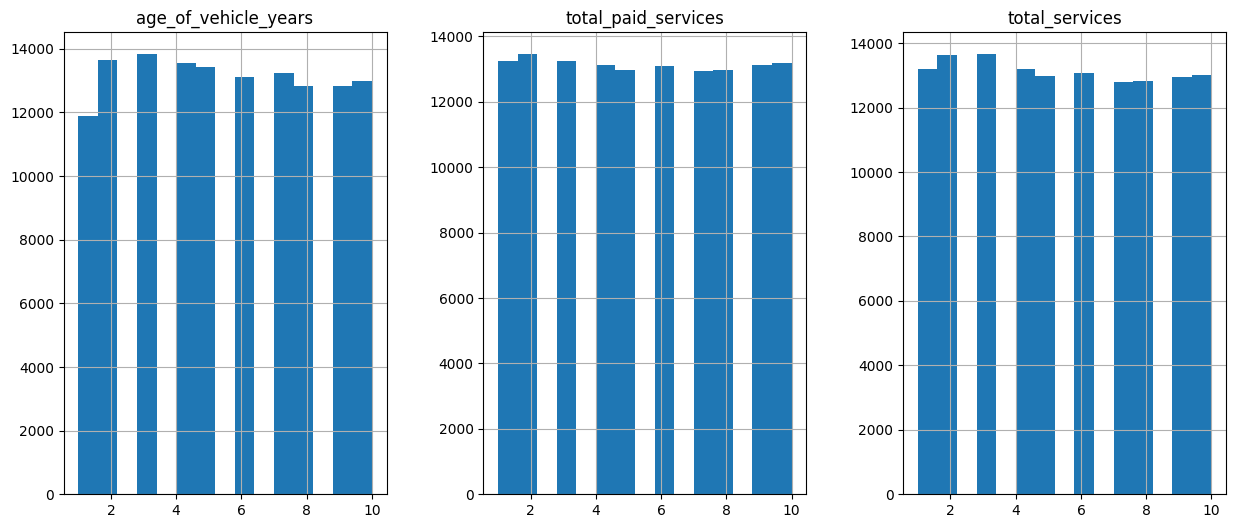

In [137]:
# Step 3: Visualize Numeric Distributions
# Histograms for numeric variables
numeric_cols = ['age_of_vehicle_years', 'total_paid_services', 'total_services']
data[numeric_cols].hist(bins=15, figsize=(15, 6), layout=(1, 3))
plt.show()


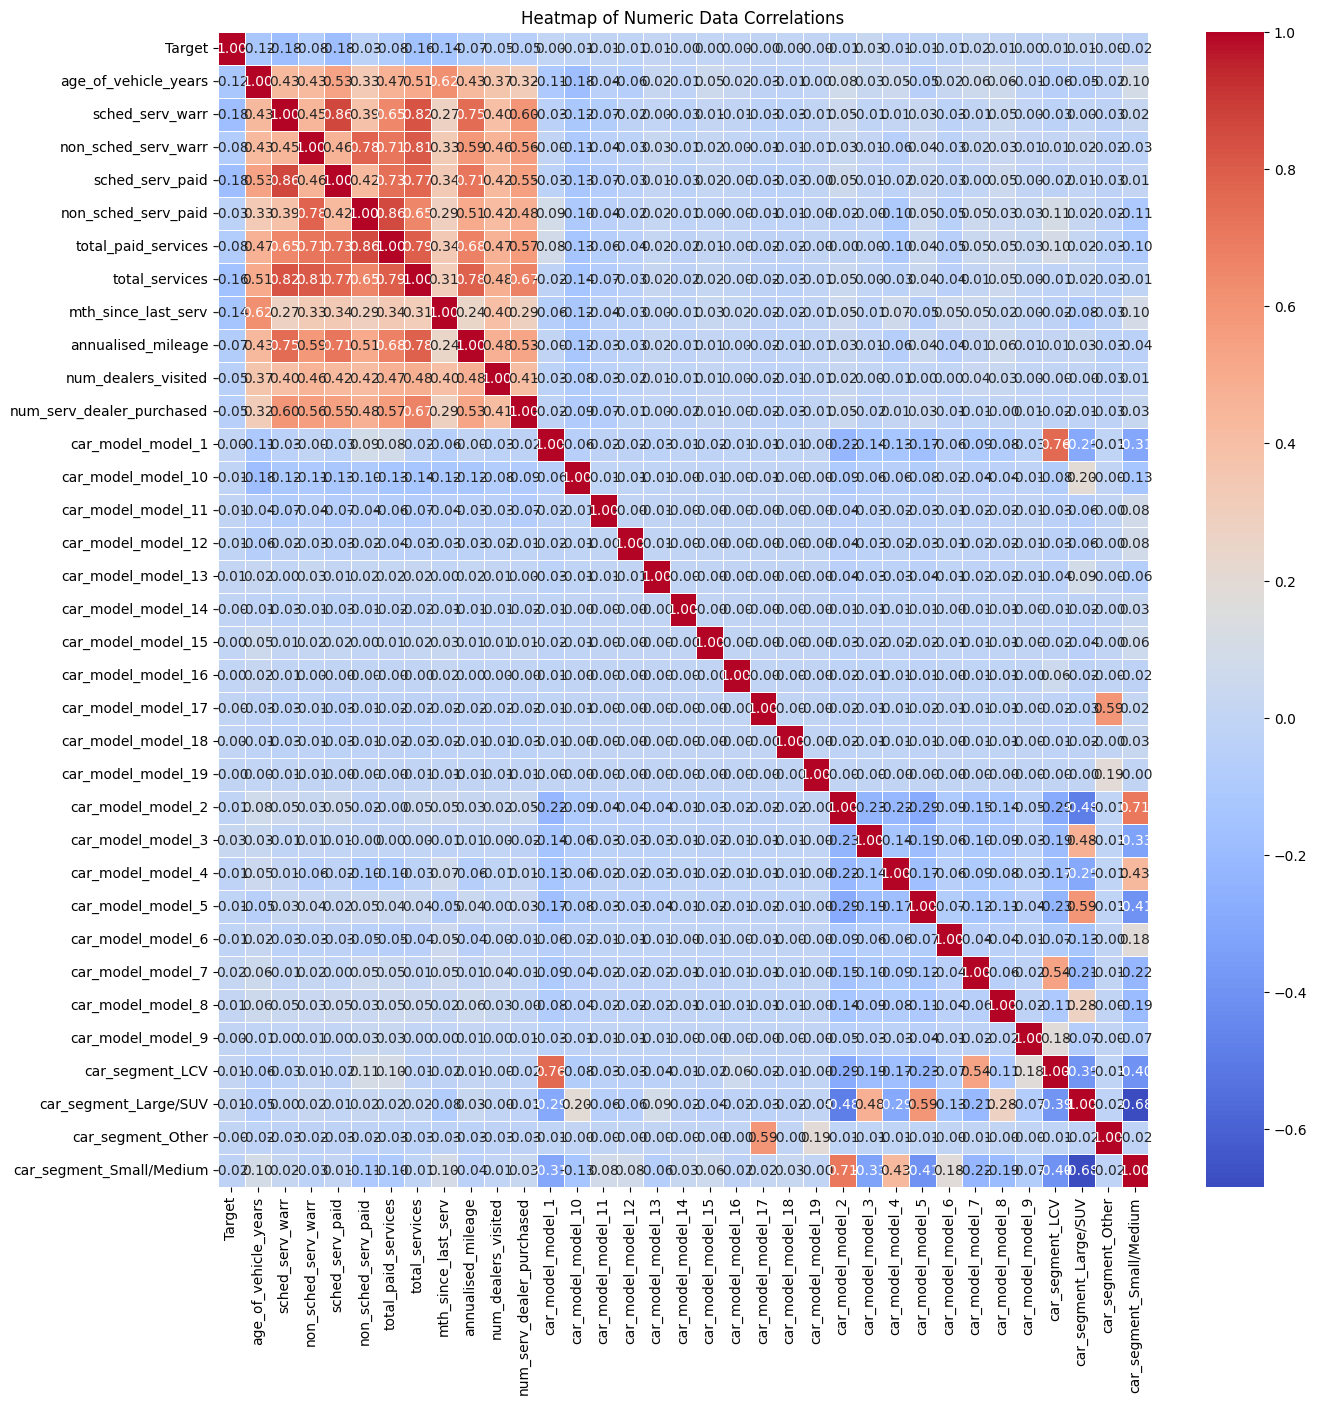

In [138]:
# Compute the correlation matrix for the numeric data
# Exclude 'age_band' and 'gender' columns
data_numeric = data.drop(['gender'], axis=1)
correlation_matrix = data_numeric.corr()

# Generate a heatmap of the correlations
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Numeric Data Correlations')
plt.show()

# Explore Target variable¶

In [ ]:
training_data = pd.read_csv('/Users/a/Downloads/repurchase_dataset.csv')

In [139]:
# Explore the target variable 
# Summary statistics
print("Summary Statistics :")
print(training_data['Target'].describe())

Summary Statistics :
count    131337.000000
mean          0.026809
std           0.161525
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Target, dtype: float64


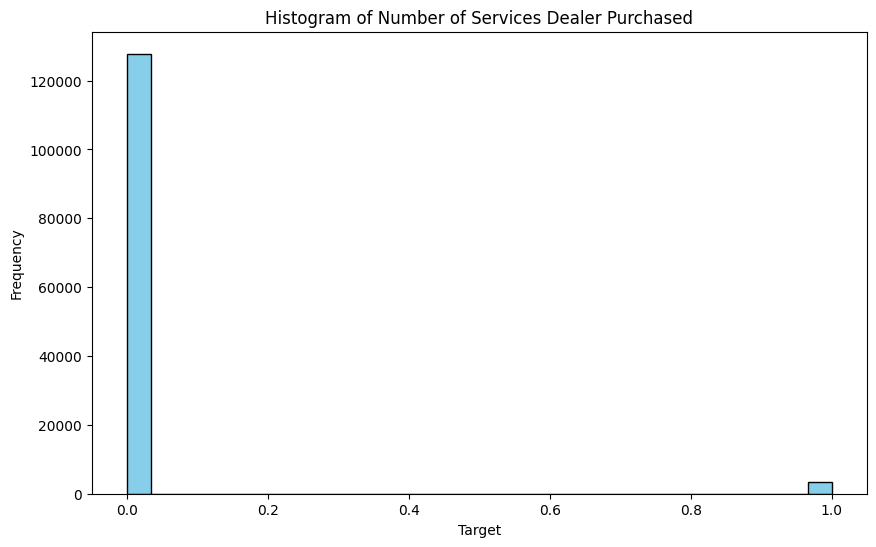

In [120]:
# Histogram of the 'num_serv_dealer_purchased' variable
plt.figure(figsize=(10, 6))
plt.hist(training_data['Target'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Number of Services Dealer Purchased')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

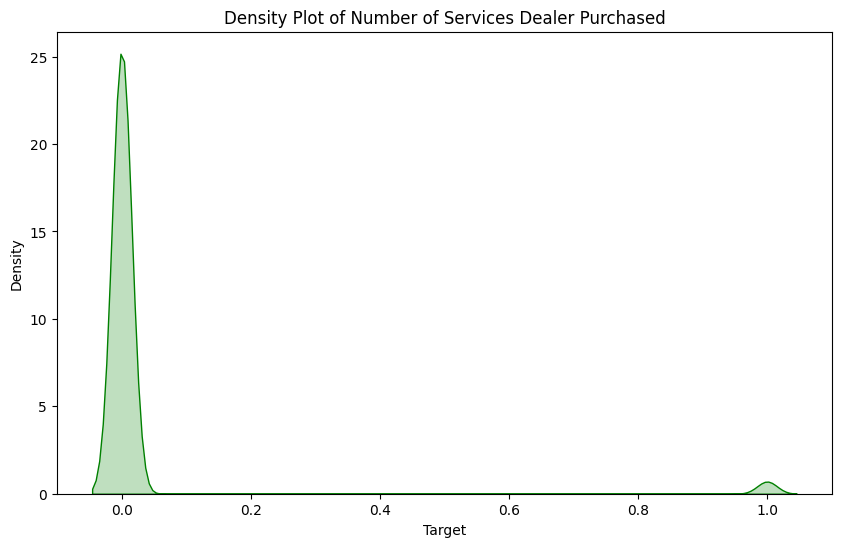

In [121]:
plt.figure(figsize=(10, 6))
sns.kdeplot(training_data['Target'], shade=True, color='green')
plt.title('Density Plot of Number of Services Dealer Purchased')
plt.xlabel('Target')
plt.ylabel('Density')
plt.show()


# Explore Variables of Interest¶

Summary Statistics for selected columns:
       total_paid_services  total_services  num_dealers_visited  \
count        131337.000000   131337.000000        131337.000000   
mean              5.481692        5.454967             5.485438   
std               2.880408        2.875961             2.876772   
min               1.000000        1.000000             1.000000   
25%               3.000000        3.000000             3.000000   
50%               5.000000        5.000000             5.000000   
75%               8.000000        8.000000             8.000000   
max              10.000000       10.000000            10.000000   

       annualised_mileage  
count       131337.000000  
mean             5.502836  
std              2.854896  
min              1.000000  
25%              3.000000  
50%              5.000000  
75%              8.000000  
max             10.000000  


/Users/a/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/a/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/a/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/a/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/a/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/a/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1615: UserWarning: Ign

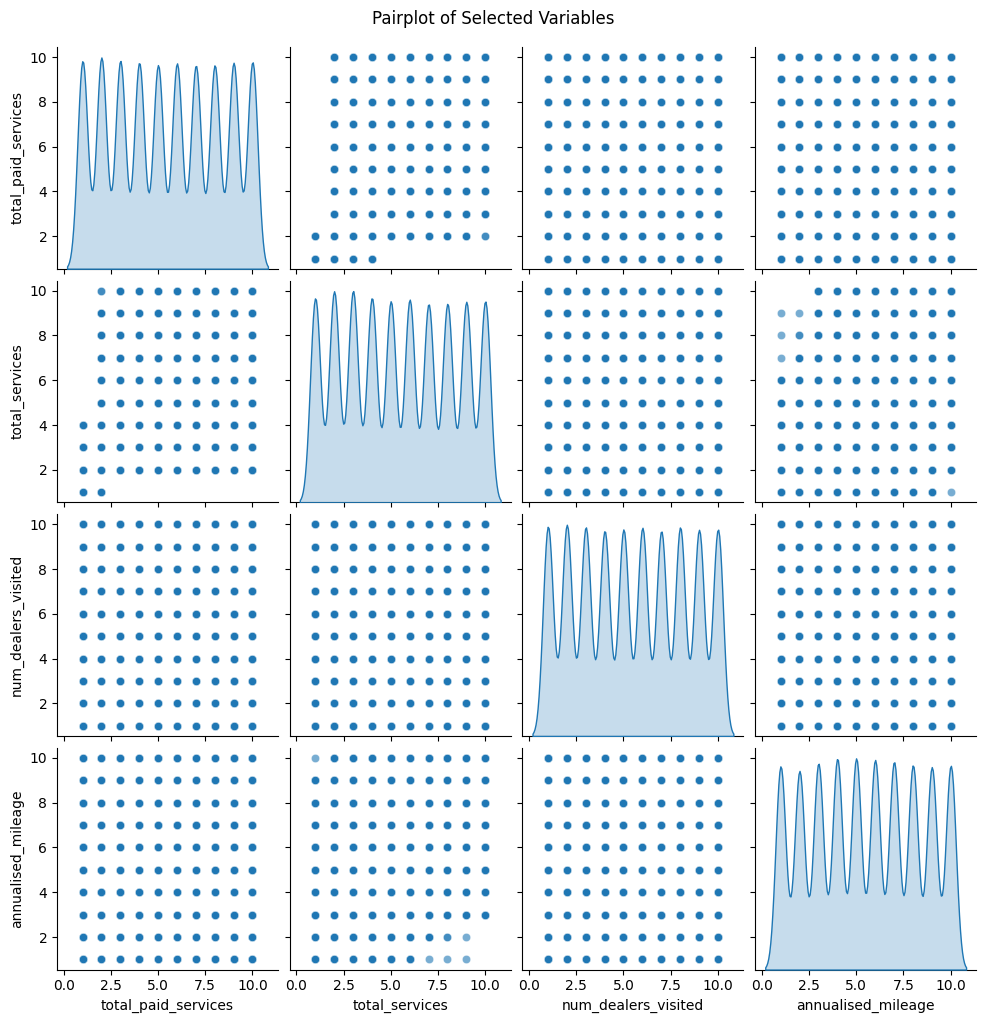

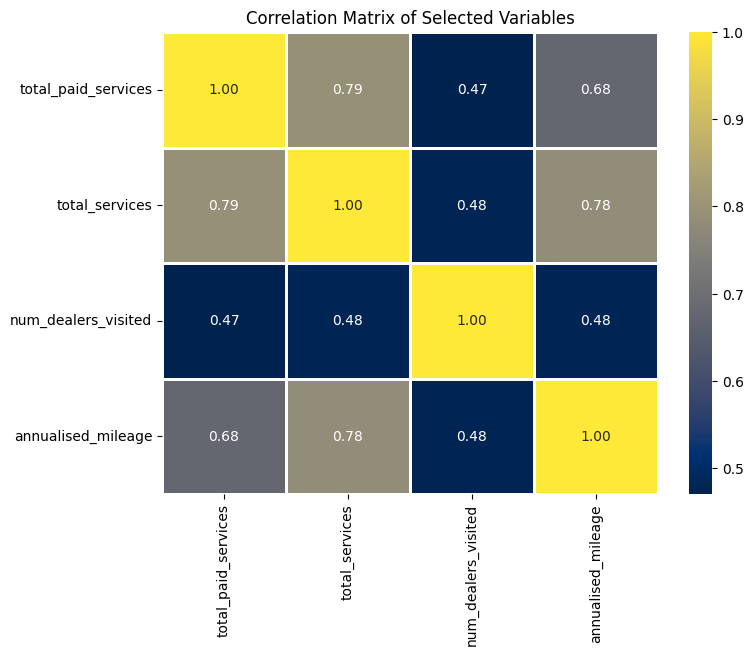

In [122]:
# Selecting specific columns of interest
columns_of_interest = ['total_paid_services', 'total_services', 'num_dealers_visited', 'annualised_mileage']

# Display summary statistics for these columns
print("Summary Statistics for selected columns:")
print(data[columns_of_interest].describe())

# Improved Pairplot with a custom color palette
sns.pairplot(data[columns_of_interest], palette='viridis', diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Selected Variables', y=1.02)
plt.show()

# Correlation matrix with a more readable color map and annotations
correlation_matrix = data[columns_of_interest].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', fmt=".2f", linewidths=1, linecolor='white')
plt.title('Correlation Matrix of Selected Variables')
plt.show()

# Split Dataset

In [124]:
X = data_numeric.drop('Target', axis=1)
y = data_numeric['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model

In [125]:
# Using Logistic Regression as a baseline
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))
print("ROC AUC score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     25608
           1       0.83      0.20      0.33       660

    accuracy                           0.98     26268
   macro avg       0.91      0.60      0.66     26268
weighted avg       0.98      0.98      0.97     26268

ROC AUC score: 0.9015755611409313


# Enhanced Logistic Regression with Feature Engineering and Hyperparameter Tuning

In [126]:
from sklearn.preprocessing import PolynomialFeatures

# Feature Engineering: Adding polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_train)

# Scale polynomial features
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Hyperparameter tuning with the enhanced dataset
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs']
}
grid_search = GridSearchCV(LogisticRegression(max_iter=10000), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_poly_scaled, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
X_test_poly = poly.transform(X_test)
X_test_poly_scaled = scaler.transform(X_test_poly)
predictions = best_model.predict(X_test_poly_scaled)
print("ROC AUC score:", roc_auc_score(y_test, best_model.predict_proba(X_test_poly_scaled)[:, 1]))

ROC AUC score: 0.9828881007828992


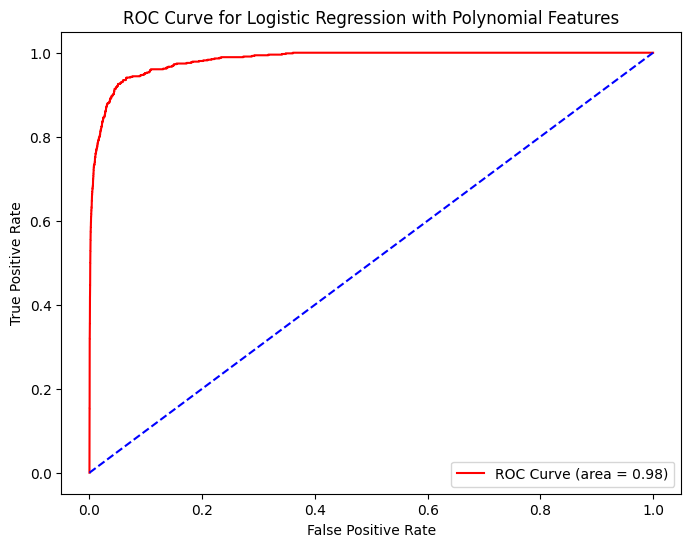

In [89]:
# Calculate ROC curve from y_test and probabilities
probabilities = best_model.predict_proba(X_test_poly_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression with Polynomial Features')
plt.legend(loc="lower right")
plt.show()

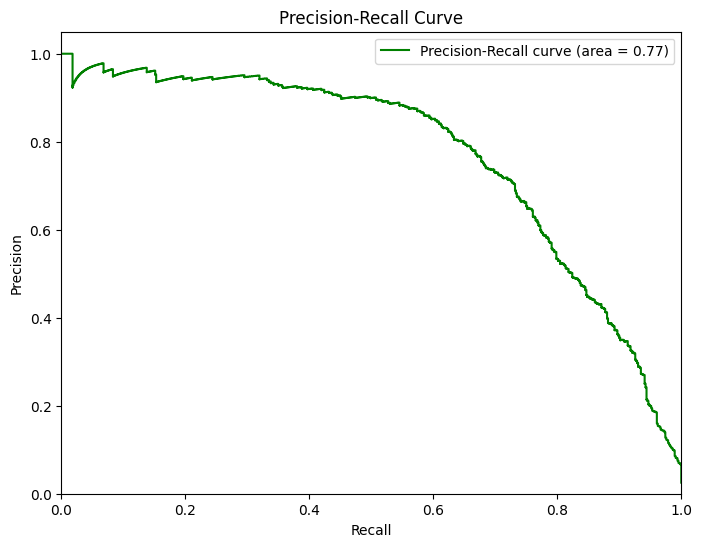

In [91]:
precision, recall, _ = precision_recall_curve(y_test, probabilities)
average_precision = average_precision_score(y_test, probabilities)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', color='green', label=f'Precision-Recall curve (area = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

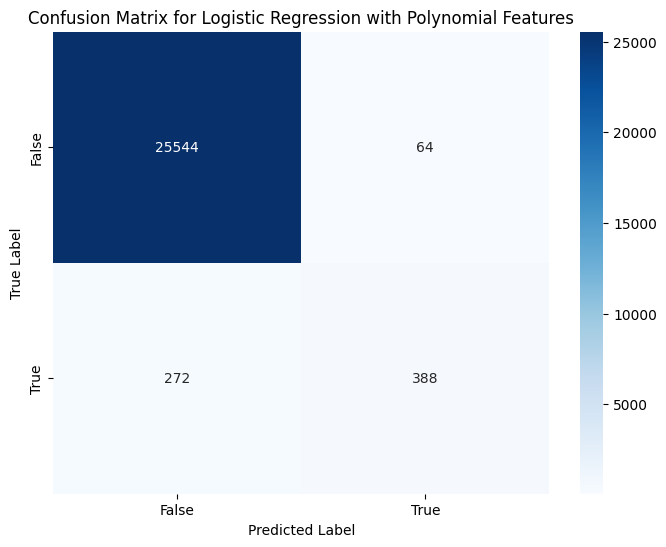

In [94]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix in a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression with Polynomial Features')
plt.show()

/var/folders/dr/5k821_gs1pz98b4z_8sykg880000gn/T/ipykernel_34753/2868040432.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance.head(20), x='Importance', y='Feature', palette='viridis')


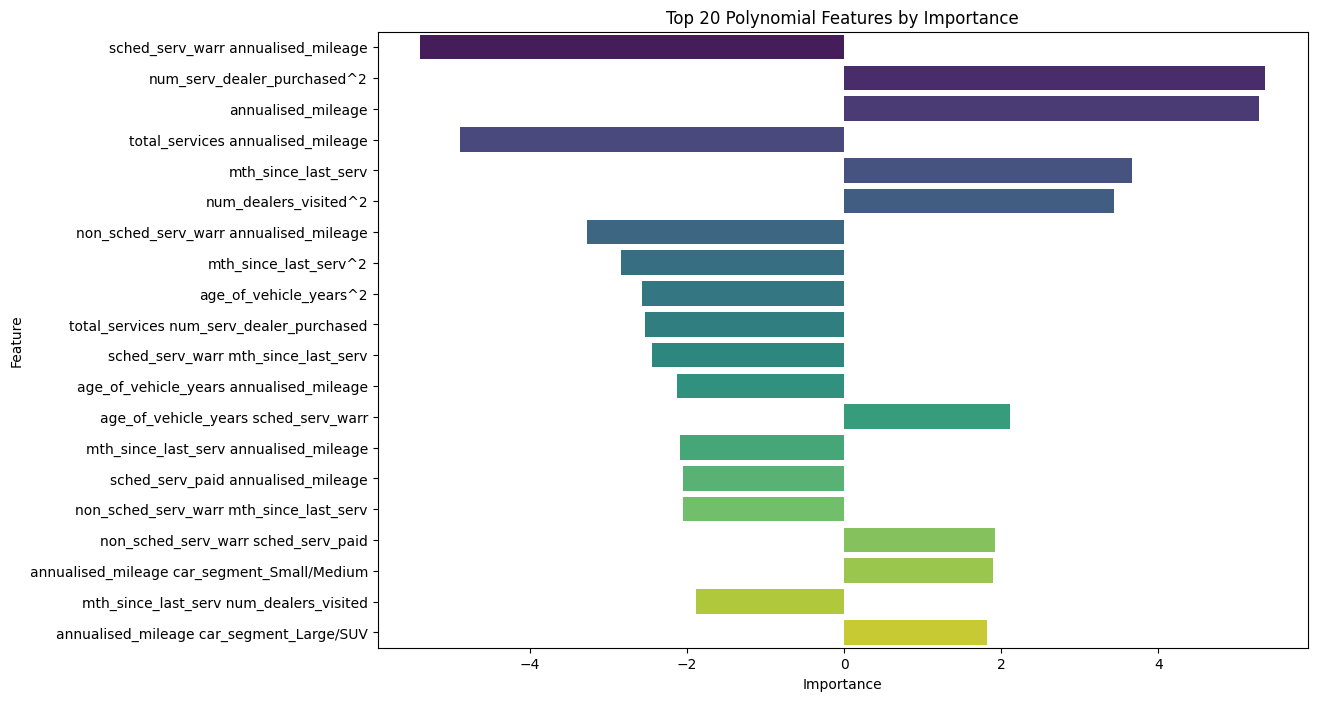

In [96]:
# Coefficients from the model
coefficients = best_model.coef_[0]

# Correct method to get feature names for scikit-learn 1.0 or later
feature_names = poly.get_feature_names_out()

# Create a DataFrame of features and their importance
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', key=abs, ascending=False)

# Plotting feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(20), x='Importance', y='Feature', palette='viridis')
plt.title('Top 20 Polynomial Features by Importance')
plt.show()

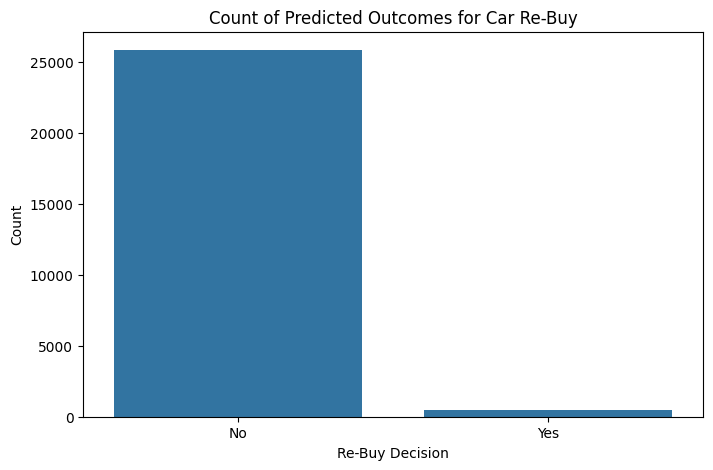

In [102]:
# Count of each class in predictions
class_counts = np.unique(predictions, return_counts=True)

# Plotting the bar plot of class counts
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts[0], y=class_counts[1])
plt.title('Count of Predicted Outcomes for Car Re-Buy')
plt.xlabel('Re-Buy Decision')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes']) 
plt.show()

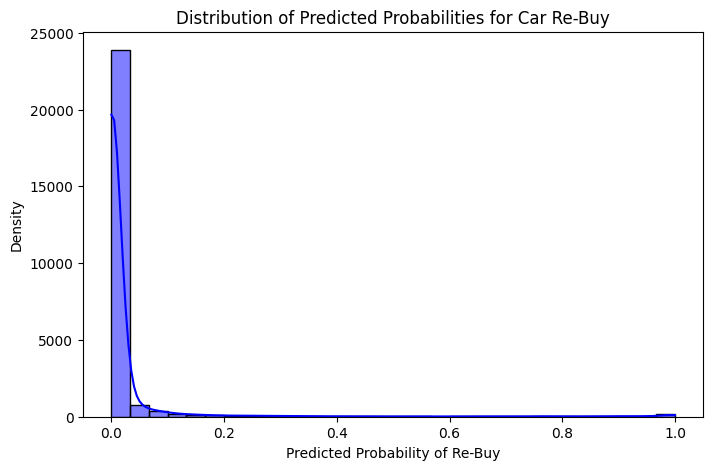

In [103]:
# Scatter plot or density plot of predicted probabilities
probabilities = best_model.predict_proba(X_test_poly_scaled)[:, 1]  # Probabilities of the positive class (yes)
plt.figure(figsize=(8, 5))
sns.histplot(probabilities, bins=30, kde=True, color='blue')
plt.title('Distribution of Predicted Probabilities for Car Re-Buy')
plt.xlabel('Predicted Probability of Re-Buy')
plt.ylabel('Density')
plt.show()